In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats as sms
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Exploration

In [2]:
df = pd.read_csv('P1train.csv', header=0)

print(list(df.columns.values))
print(df.shape)
print(df['state_abbreviation'].unique())

df.dropna(subset=['HilaryPercent'], how='all', inplace = True)

['state_abbreviation', 'PST045214', 'PST040210', 'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213', 'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214', 'LND110210', 'POP060210', 'Bernie Sanders', 'Donald Trump', 'Hillary Clinton', 'John Kasich', 'Ted Cruz', 'HilaryPercent']
(2498, 58)
['WI' 'TN' 'VA' 'GA' 'NY' 'WV' 'AL' 'DE' 'OK' 'IL' 'SC' 'NE' 'KY' 'FL'
 'CO' 'WY' 'TX' 'NM' 'MT' 'MI' 'AR' 'MS' 'SD' 'PA' 'WA' 'NJ' 'NC' 'ID'
 'OR' 'CA' 'MO' 'IN' 'OH' 'IA' 'LA' 'UT' 'MD' 'HI' 'NV' 'AZ']


((array([-3.45167678, -3.20464457, -3.06785193, ...,  3.06785193,
          3.20464457,  3.45167678]),
  array([0.07142857, 0.09803922, 0.10526316, ..., 0.936626  , 0.94843049,
         0.95574637])),
 (0.15720954602475332, 0.5524403000962989, 0.9912261961340528))

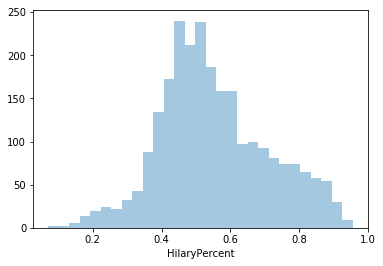

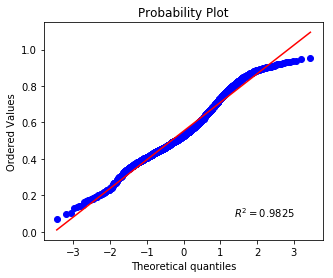

In [6]:
sns.distplot(df['HilaryPercent'], kde=False)

fig, ax = plt.subplots(figsize=(5,4))
stats.probplot(df['HilaryPercent'],dist=stats.norm,rvalue=True,plot=ax)

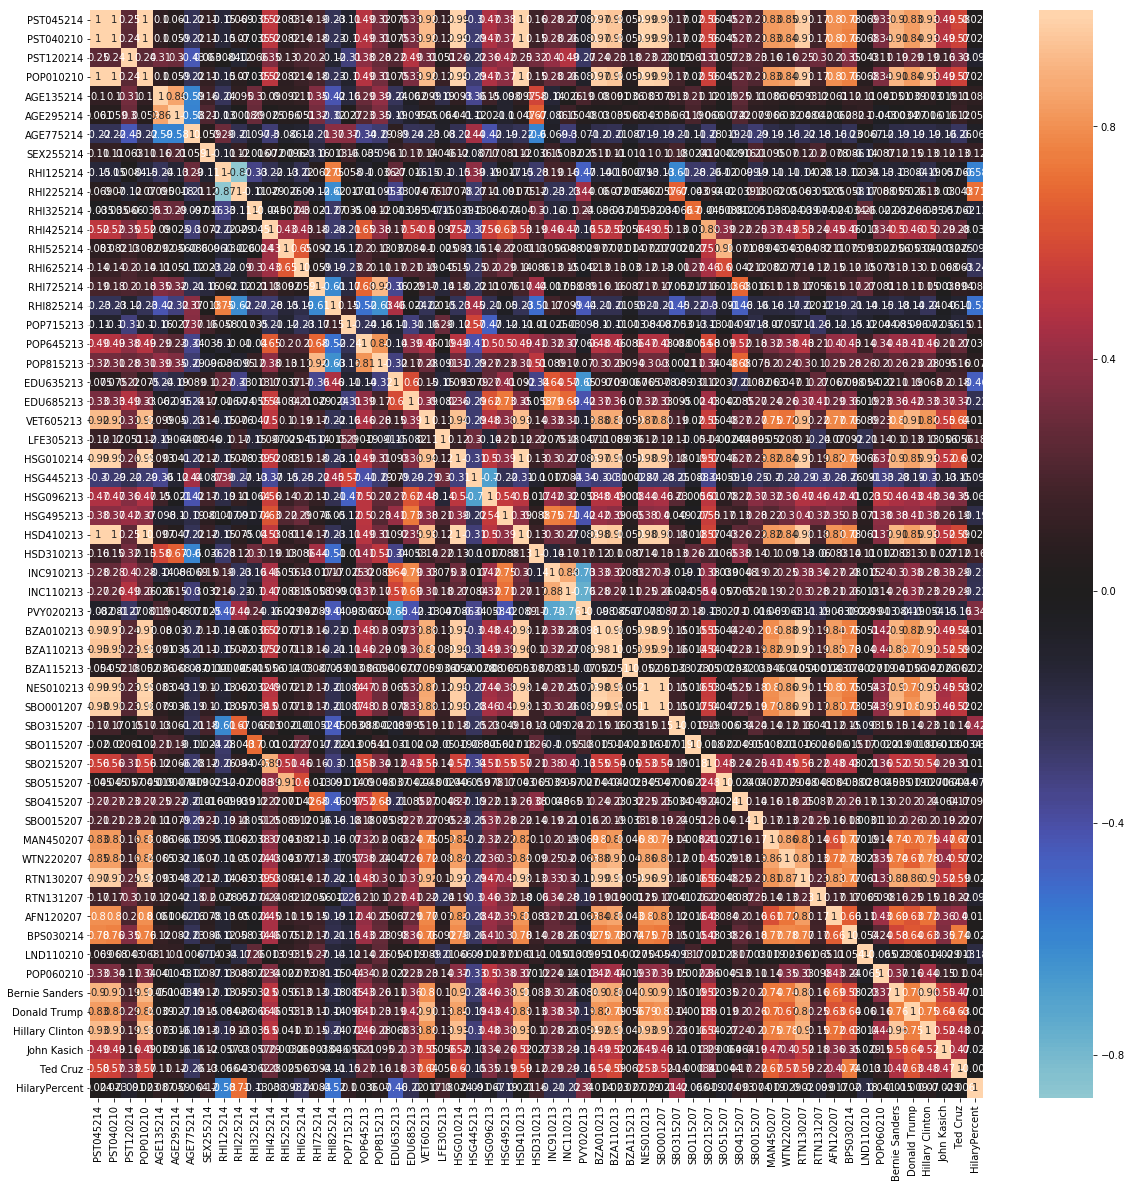

In [7]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), center=0, annot=True, annot_kws={"size": 10})

From the heatmap, we notice that some predictors have highly correlated.<br>
In below code, we plot X1 vs X2 where |corr(X1,X2)| > 0.95, to try to eliminate some predictors if X1 = bX2<br>


C:\Users\joechongwk\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


46
[['PST045214', 'PST040210'], ['PST045214', 'POP010210'], ['PST045214', 'HSG010214'], ['PST045214', 'HSD410213'], ['PST045214', 'BZA010213'], ['PST045214', 'BZA110213'], ['PST045214', 'NES010213'], ['PST045214', 'SBO001207'], ['PST045214', 'RTN130207'], ['PST040210', 'POP010210'], ['PST040210', 'HSG010214'], ['PST040210', 'HSD410213'], ['PST040210', 'BZA010213'], ['PST040210', 'BZA110213'], ['PST040210', 'NES010213'], ['PST040210', 'SBO001207'], ['PST040210', 'RTN130207'], ['POP010210', 'HSG010214'], ['POP010210', 'HSD410213'], ['POP010210', 'BZA010213'], ['POP010210', 'BZA110213'], ['POP010210', 'NES010213'], ['POP010210', 'SBO001207'], ['POP010210', 'RTN130207'], ['HSG010214', 'HSD410213'], ['HSG010214', 'BZA010213'], ['HSG010214', 'BZA110213'], ['HSG010214', 'NES010213'], ['HSG010214', 'SBO001207'], ['HSG010214', 'RTN130207'], ['HSD410213', 'BZA010213'], ['HSD410213', 'BZA110213'], ['HSD410213', 'NES010213'], ['HSD410213', 'SBO001207'], ['HSD410213', 'RTN130207'], ['BZA010213', 'B

<Figure size 432x288 with 0 Axes>

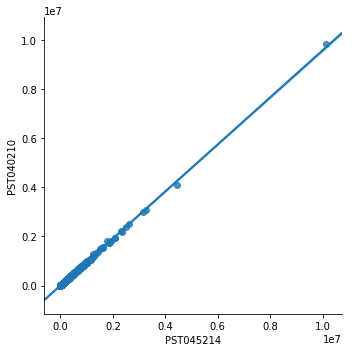

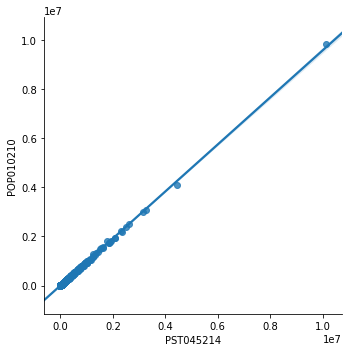

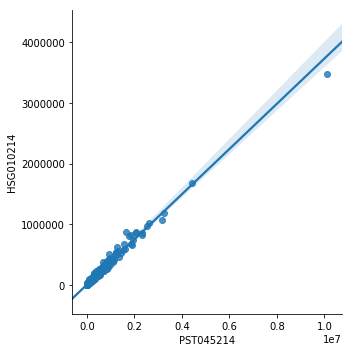

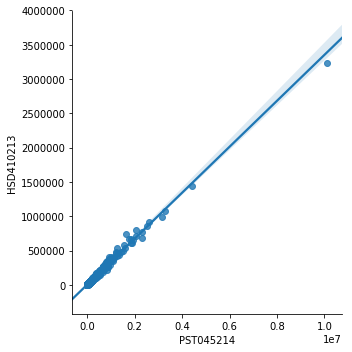

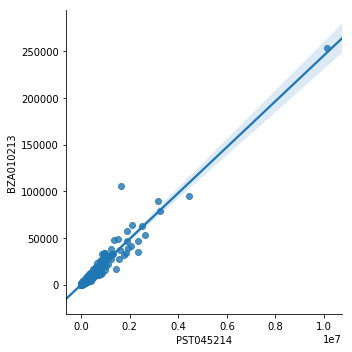

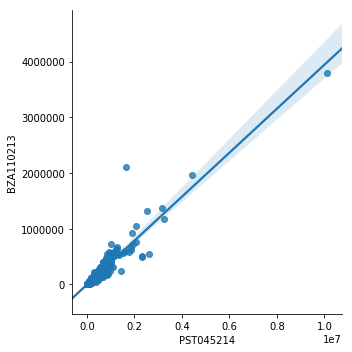

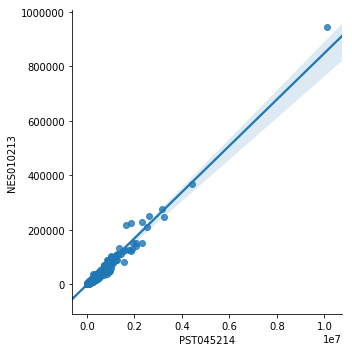

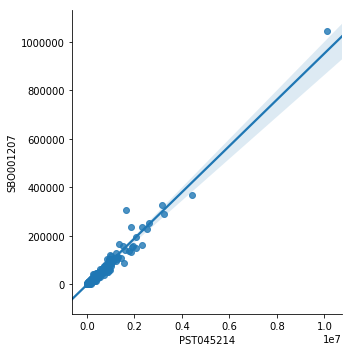

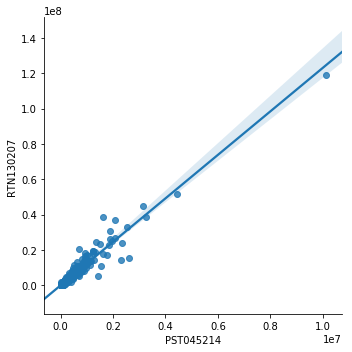

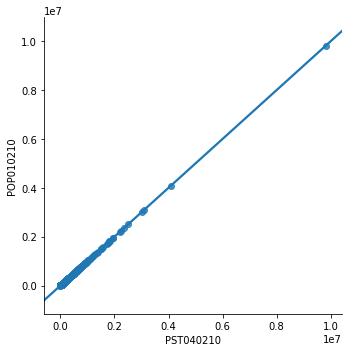

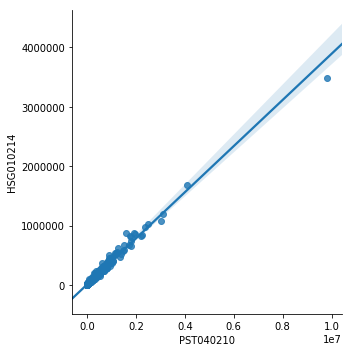

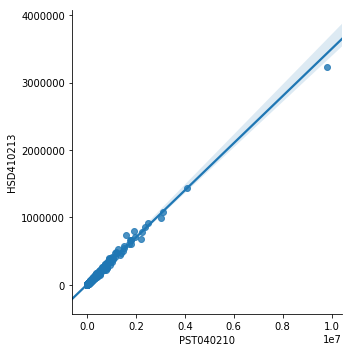

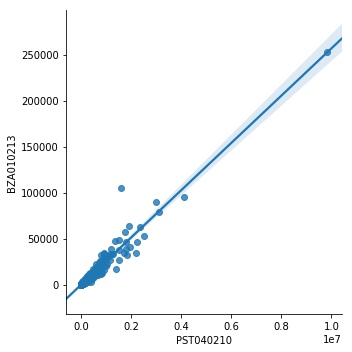

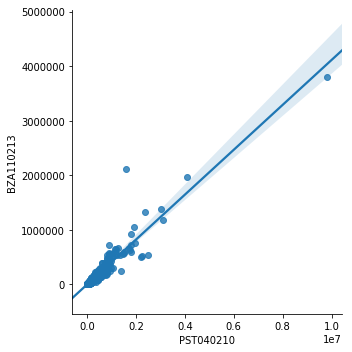

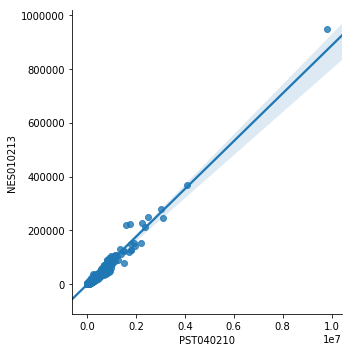

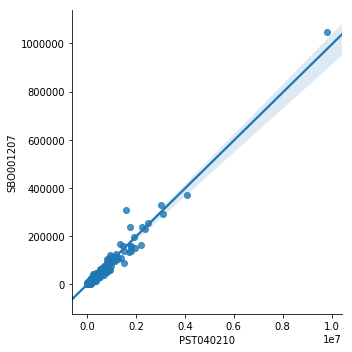

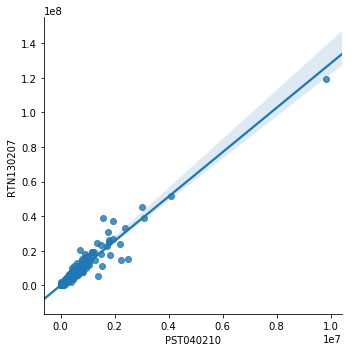

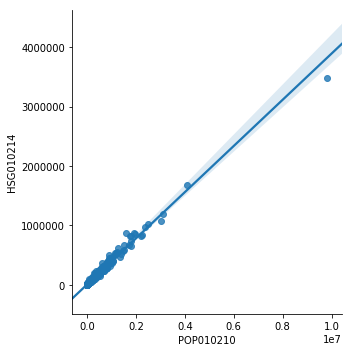

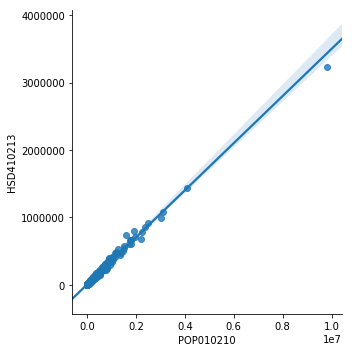

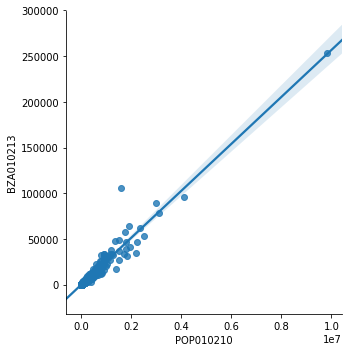

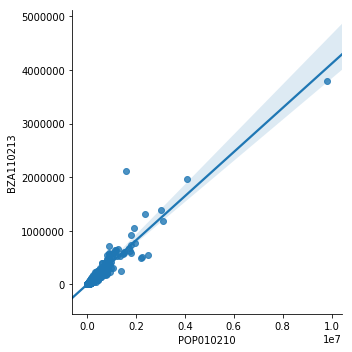

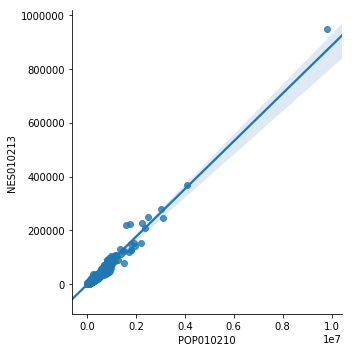

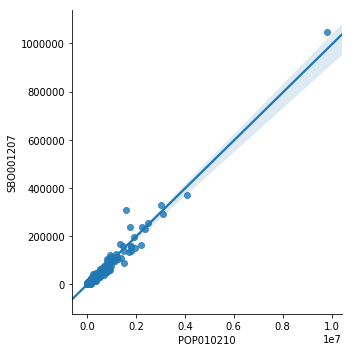

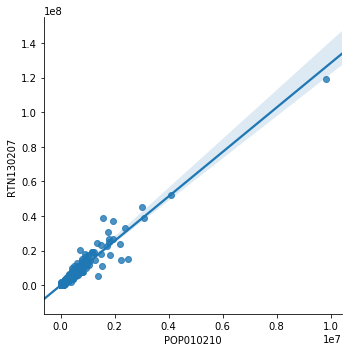

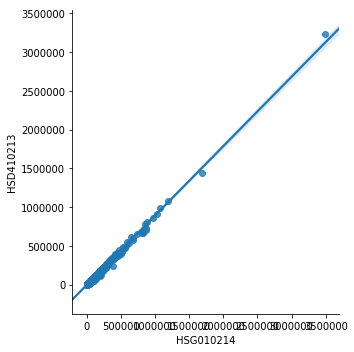

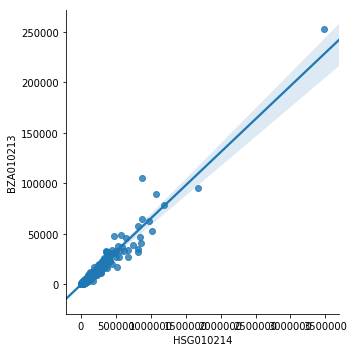

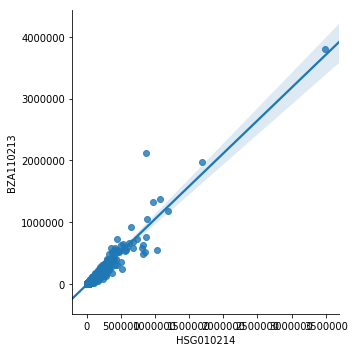

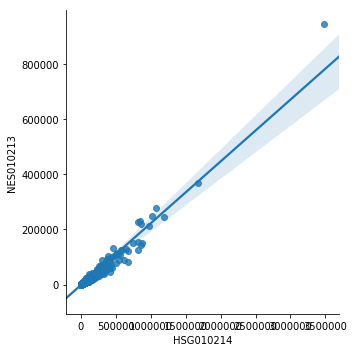

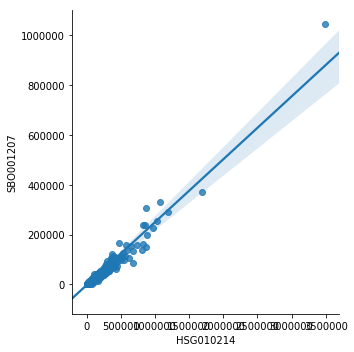

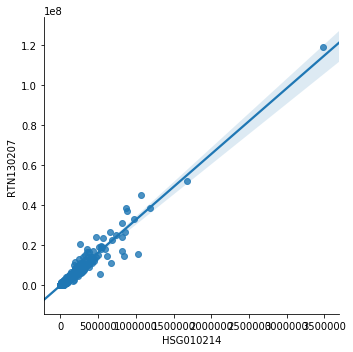

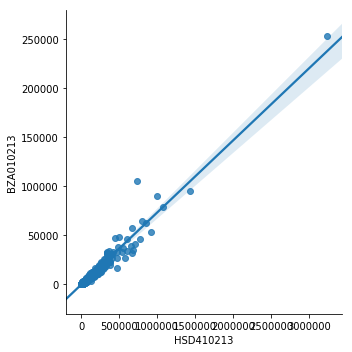

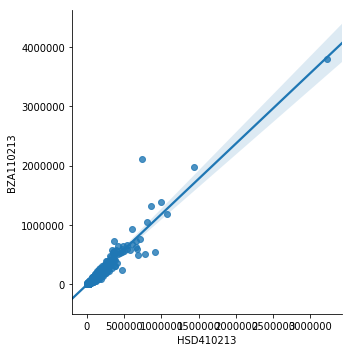

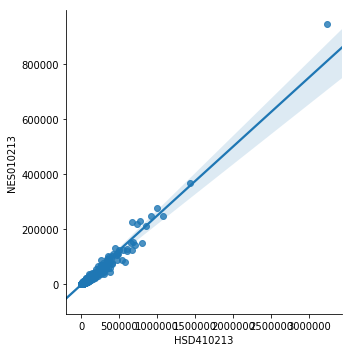

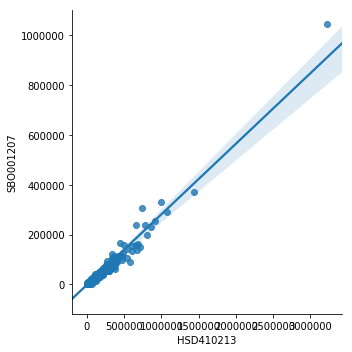

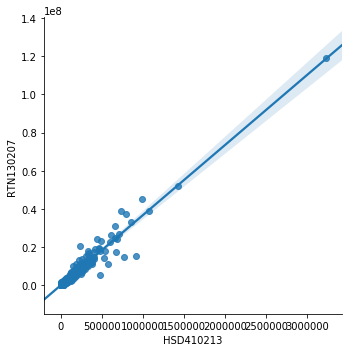

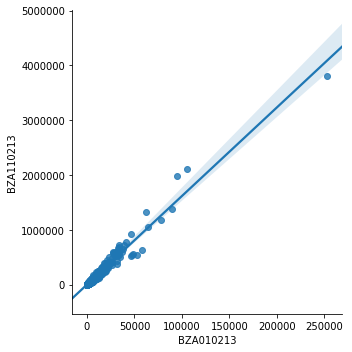

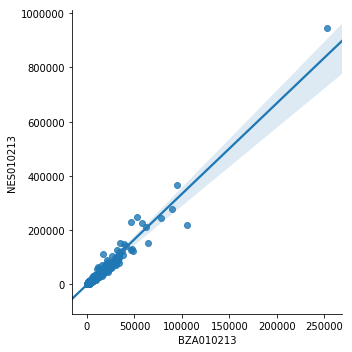

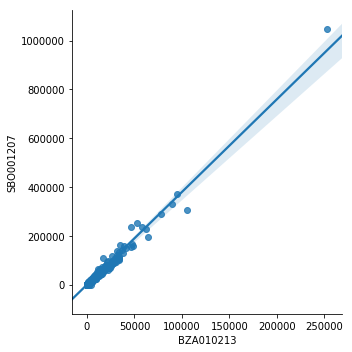

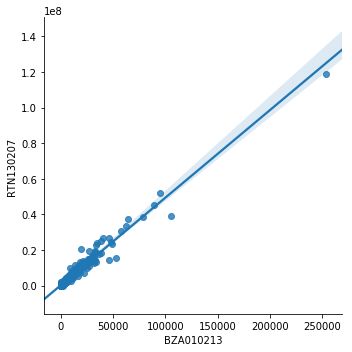

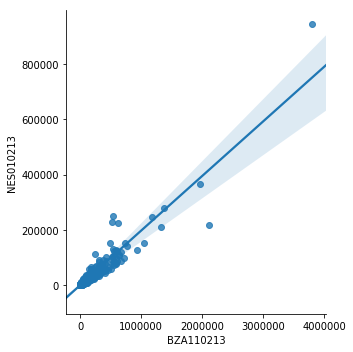

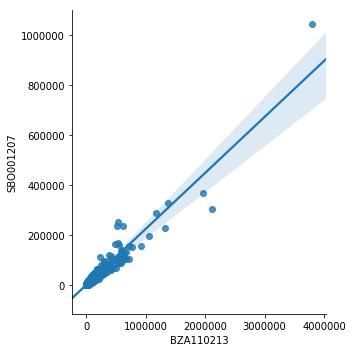

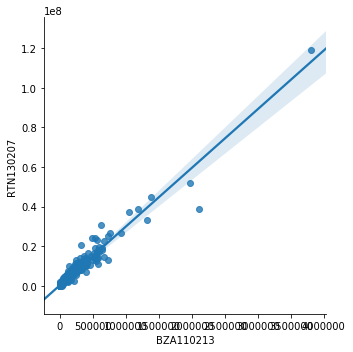

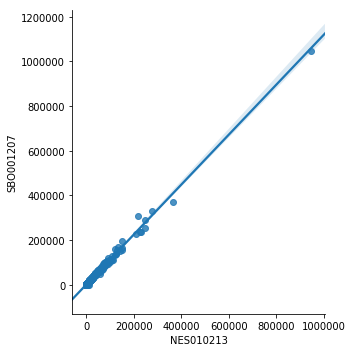

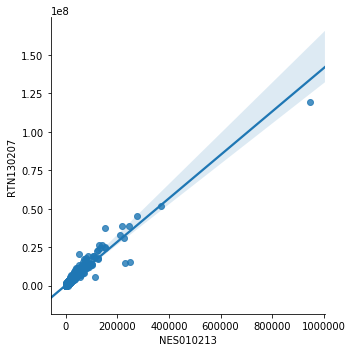

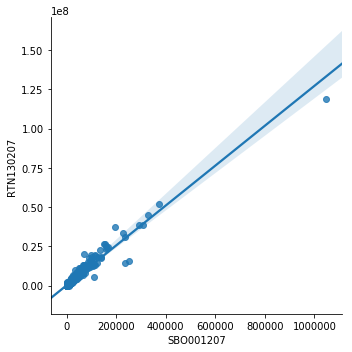

In [8]:
# to study independent variables that have correlation >0.95

dfcor = df.corr()

predictors1 = ['PST045214', 'PST040210', 'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213', 'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214', 'LND110210', 'POP060210']
predictors2 = ['PST045214', 'PST040210', 'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213', 'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214', 'LND110210', 'POP060210']

i = 1
pairlist = []

for p in predictors1:
    predictors2.remove(p)
    for q in predictors2:
        if abs(dfcor.loc[p,q]) > 0.95:
            plt.figure(i)
            sns.lmplot(p,q,data=df, fit_reg=True)
            i = i + 1
            pairlist.append([p,q])
print(i)
print(pairlist)

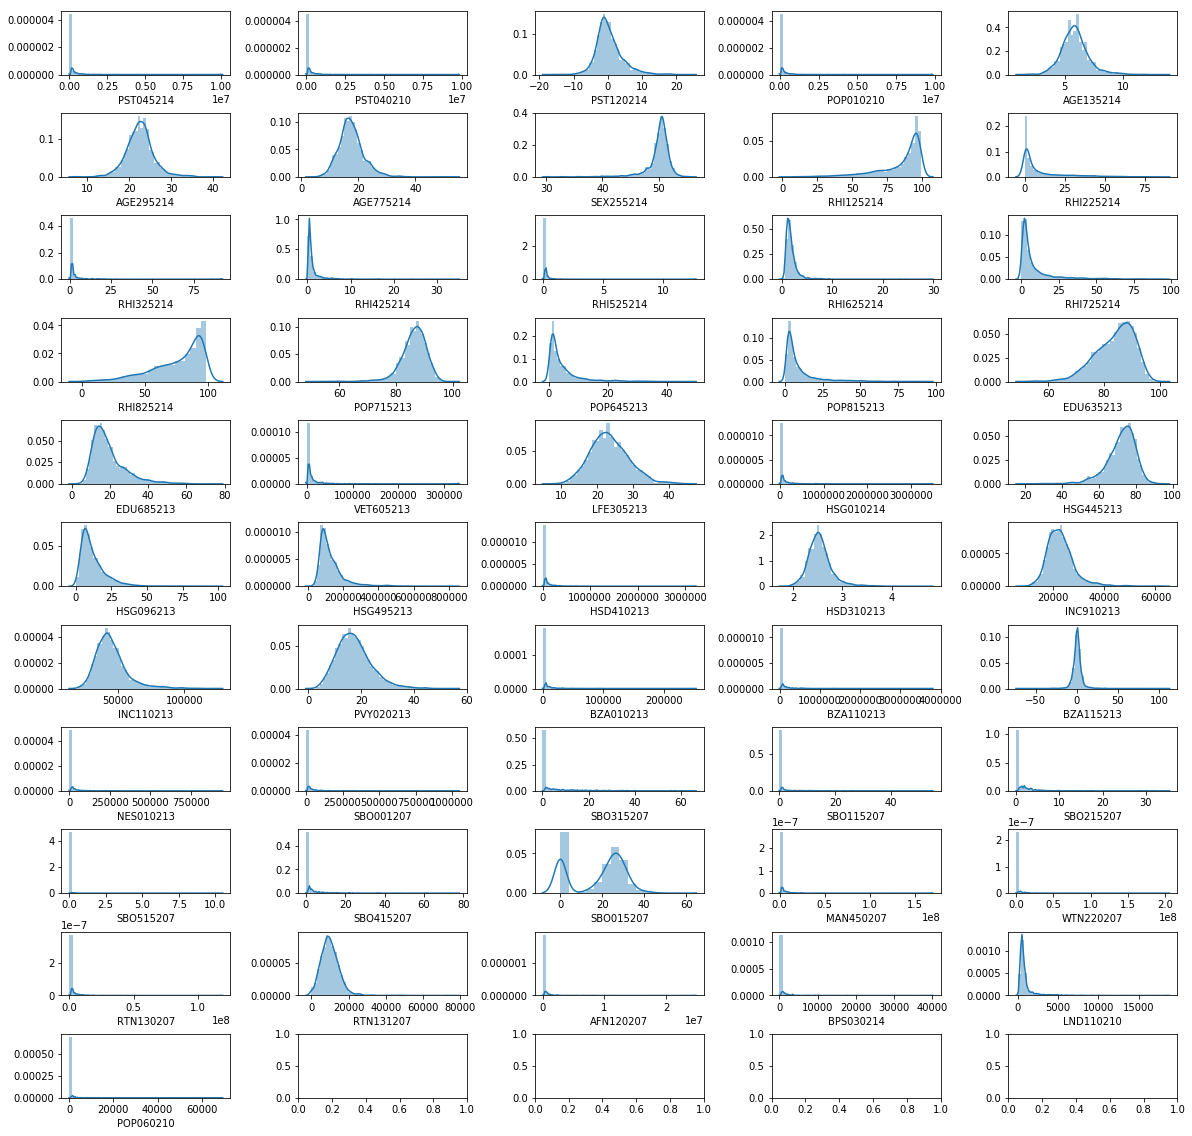

In [9]:
fig, axes = plt.subplots(figsize=(20,20), nrows=11, ncols=5)
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i, column in enumerate(predictors1):
    sns.distplot(df[column],ax=axes[i//5,i%5])

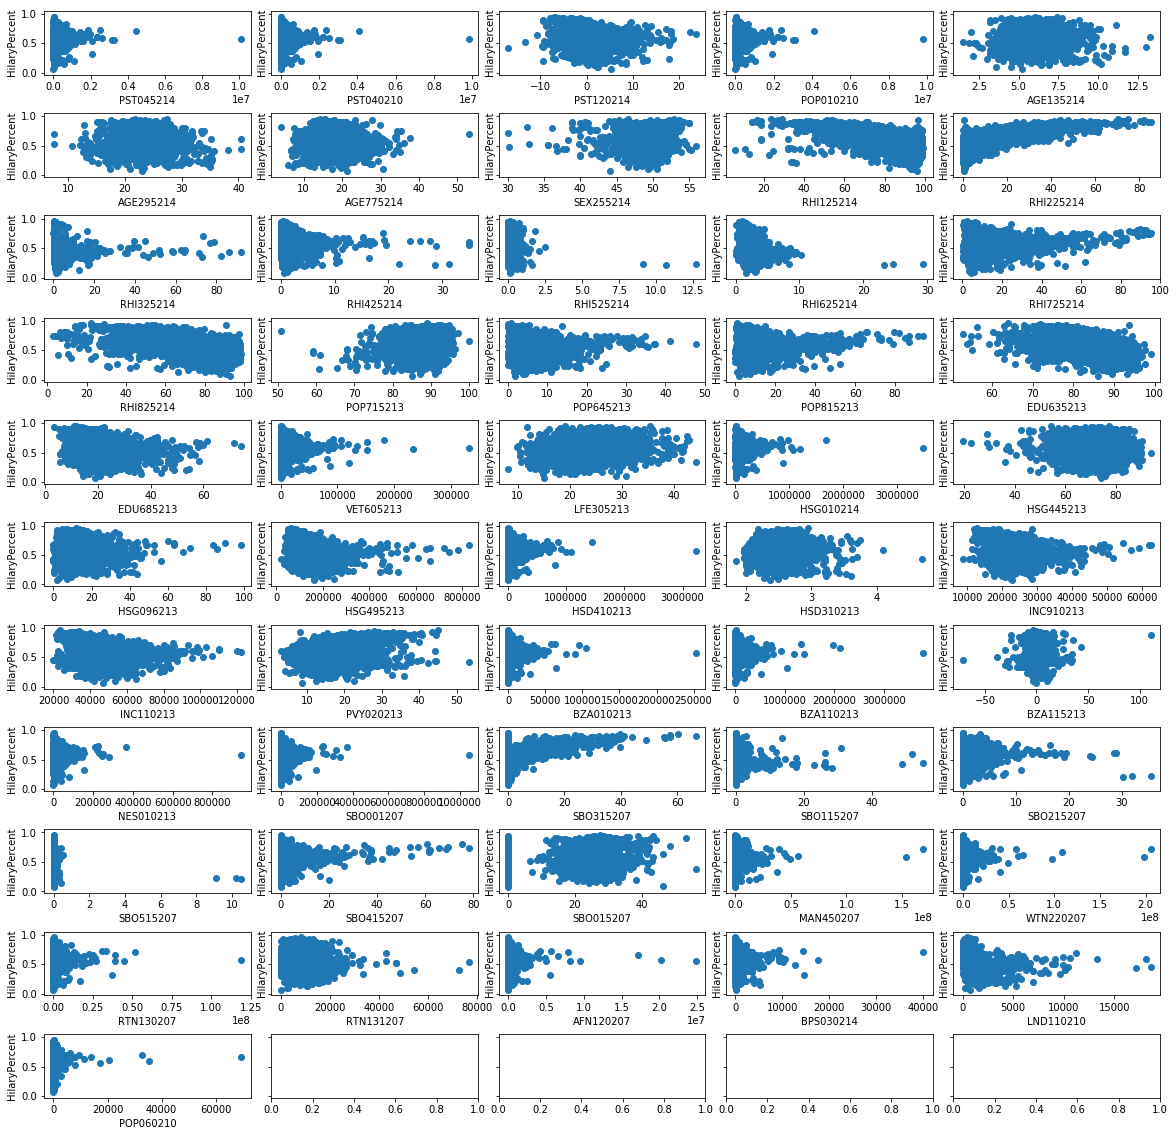

In [10]:
fig, axes = plt.subplots(figsize=(20,20), nrows=11, ncols=5, sharey=True)
fig.subplots_adjust(hspace=0.6, wspace=0.1)

for i, column in enumerate(predictors1):
    axes[i//5,i%5].scatter(df[column],df['HilaryPercent'])
    axes[i//5,i%5].set_xlabel(column)
    axes[i//5,i%5].set_ylabel('HilaryPercent')

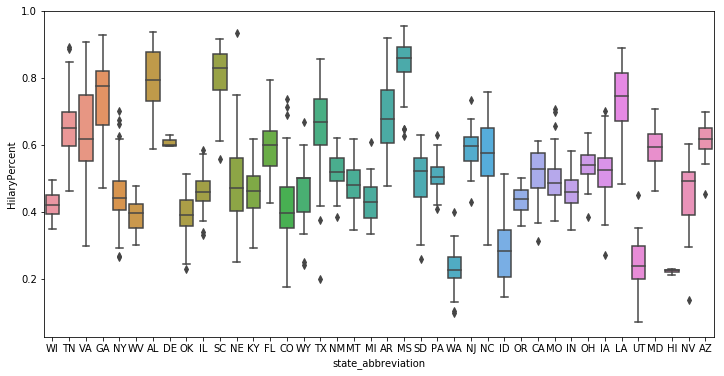

In [11]:
fig = plt.figure(figsize=(12,6))
ax = sns.boxplot(x='state_abbreviation', y='HilaryPercent', data=df)

In [12]:
%run "util_formula.py"

<Figure size 432x288 with 0 Axes>

# Finding best model of 5 predictors from selected candidates

13 candidates which have correlation with the target variables and have minimal collinearity are selected from 52.

In [25]:
#13C5+13C4+13C3+13C2+13C1, best models

pickedpredictors = ['C(state_abbreviation)','PST120214','SEX255214','RHI125214','RHI225214','POP815213','EDU635213','EDU685213','HSG495213','INC910213','INC110213','PVY020213','SBO315207']
target = 'HilaryPercent'
                    
fullmodel = modelFitting(target, pickedpredictors, df);

# enumerate all models and obtain the results
models = pd.DataFrame({"model":[], "SSE": [], "R2":[], "AR2": [], "AIC": [], "BIC": [], "Pnum":[]})

for i in range(1,6):
    models = models.append(getAll(i, target, pickedpredictors, df),ignore_index=True);
    
# get the Mallow's Cp Statistic
models = getMallowCp(models, fullmodel)

print(models)

Processed  13 models on 1 predictors
Processed  78 models on 2 predictors
Processed  286 models on 3 predictors
Processed  715 models on 4 predictors
Processed  1287 models on 5 predictors
              AIC       AR2          BIC  Pnum        R2        SSE  \
0    -5199.678585 -0.716038 -4966.909206   1.0 -0.720491  17.449310   
1    -2124.834486 -0.007870 -2113.196017   1.0 -0.008269  61.912154   
2    -2139.010179 -0.013507 -2127.371710   1.0 -0.013903  61.560405   
3    -3105.273991 -0.330998 -3093.635522   1.0 -0.331267  41.747902   
4    -3880.526218 -0.510105 -3868.887749   1.0 -0.510302  30.571024   
5    -2116.345563 -0.004479 -2104.707094   1.0 -0.004880  62.123756   
6    -2685.811327 -0.208143 -2674.172858   1.0 -0.208461  49.414481   
7    -2224.909793 -0.046985 -2213.271324   1.0 -0.047368  59.471269   
8    -2197.084082 -0.036266 -2185.445613   1.0 -0.036654  60.140127   
9    -2216.072611 -0.043594 -2204.434142   1.0 -0.043978  59.682882   
10   -2228.360306 -0.048306 -2

In [26]:
print('R2:  ' , findBest(models, 'R2')['model'])
print('AR2: ' , findBest(models, 'AR2')['model'])
print('AIC: ' , findBest(models, 'AIC')['model'])
print('BIC: ' , findBest(models, 'BIC')['model'])
print('Cp:  ' , findBest(models, 'Cp')['model'])

R2:   ('C(state_abbreviation)', 'RHI225214', 'POP815213', 'EDU685213', 'INC910213')
AR2:  ('C(state_abbreviation)', 'RHI225214', 'POP815213', 'EDU685213', 'INC910213')
AIC:  ('C(state_abbreviation)', 'RHI225214', 'POP815213', 'EDU685213', 'INC910213')
BIC:  ('C(state_abbreviation)', 'RHI225214', 'POP815213', 'EDU685213', 'INC910213')
Cp:   ('C(state_abbreviation)', 'RHI225214', 'POP815213', 'EDU685213', 'INC910213')


In [15]:
bestmodel = modelFitting(target, ['C(state_abbreviation)', 'RHI225214', 'POP815213', 'EDU685213', 'INC910213'], df);
print(bestmodel.summary())


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     285.8
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:41:27   Log-Likelihood:                 3288.9
No. Observations:                2488   AIC:                            -6490.
Df Residuals:                    2444   BIC:                            -6234.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

# QQ plot and regression plots

Text(0.5, 0, 'fittedvalues')

<Figure size 432x432 with 0 Axes>

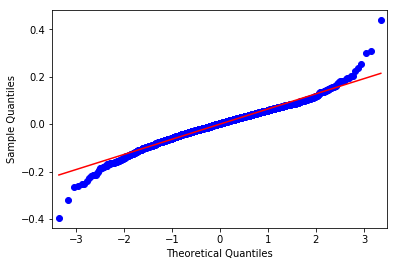

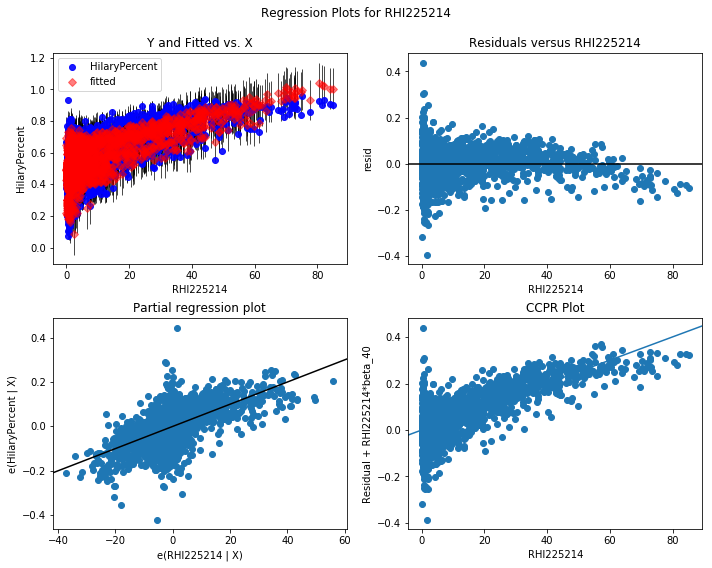

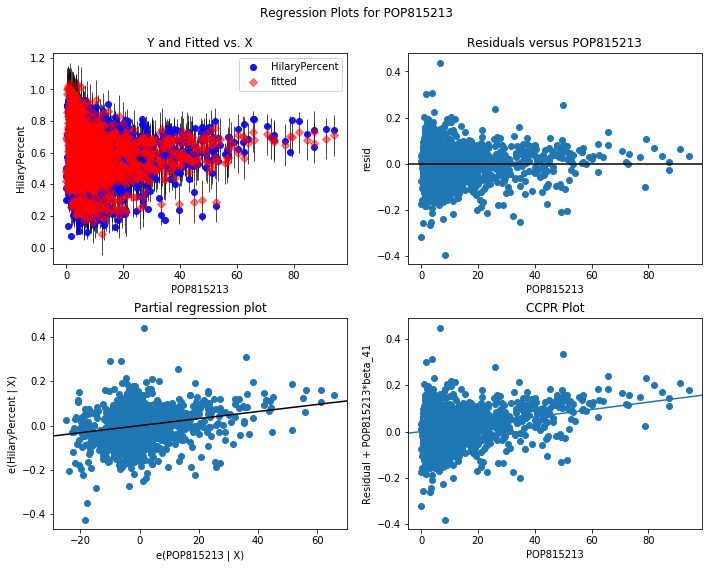

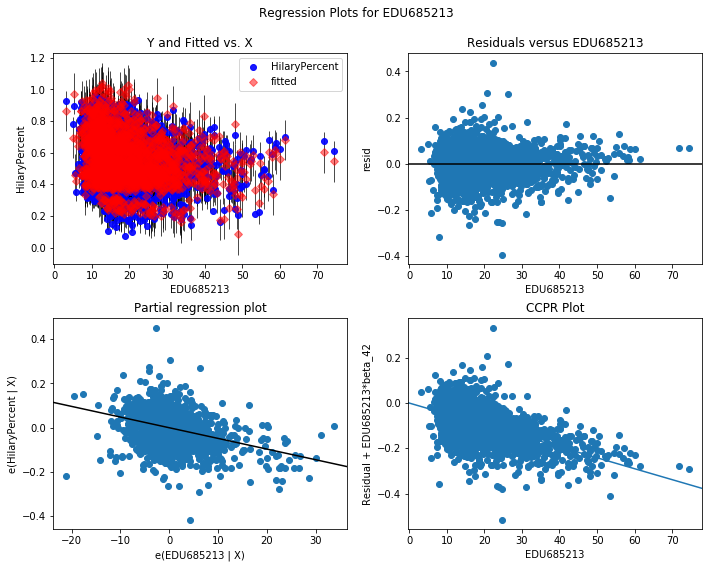

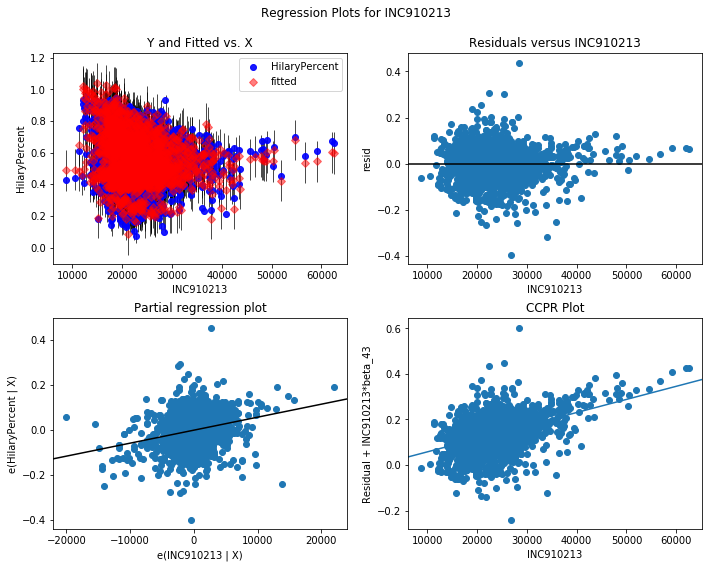

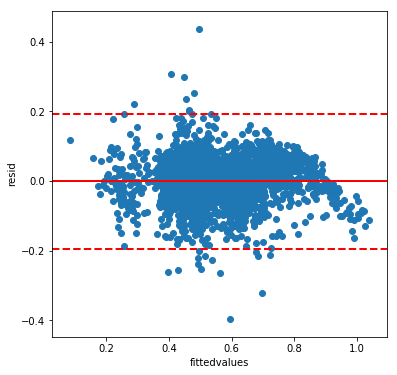

In [39]:
fig = plt.figure(figsize=(6,6))
fig = sm.qqplot(bestmodel.resid, stats.distributions.norm, line='r') 

for i in ['RHI225214', 'POP815213', 'EDU685213', 'INC910213']:
    fig = plt.figure(figsize=(10,8))
    fig = sm.graphics.plot_regress_exog(bestmodel, i , fig=fig)
    
fig = plt.figure(figsize=(6,6))
plt.scatter(bestmodel.fittedvalues, bestmodel.resid)
plt.axhline(y=0, linewidth=2, color = 'r')
#plt.axhline(y=3, linestyle='dashed', linewidth=2, color = 'r')
#plt.axhline(y=-3, linestyle='dashed', linewidth=2, color = 'r')
plt.axhline(y=bestmodel.resid.mean() + 3 * bestmodel.resid.std(), linestyle='dashed', linewidth=2, color = 'r')
plt.axhline(y=bestmodel.resid.mean() - 3 * bestmodel.resid.std(), linestyle='dashed', linewidth=2, color = 'r')
plt.ylabel('resid')
plt.xlabel('fittedvalues') 

# Influence plot

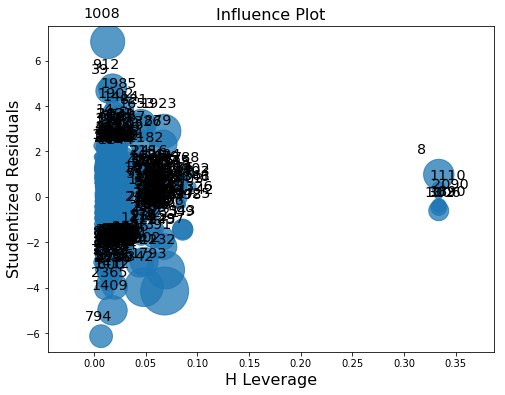

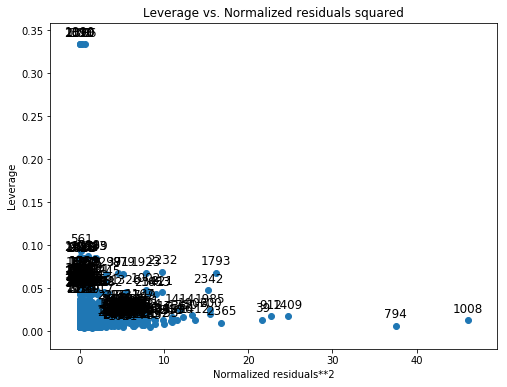

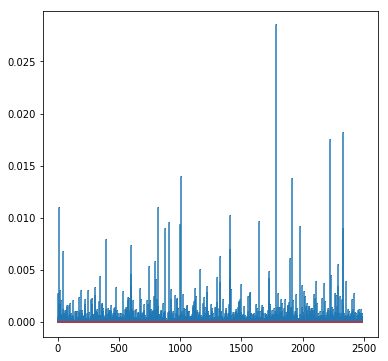

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(bestmodel, ax=ax, criterion="cooks")

fig1, ax = plt.subplots(figsize=(8,6))
fig1 = sm.graphics.plot_leverage_resid2(bestmodel, ax=ax)

# get the influence measure
influence = bestmodel.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
fig = plt.figure(figsize=(6,6))
fig = plt.stem(np.arange(len(c)), c, markerfmt=",") 

# Appling Transformation based on Residual Plot

In [30]:
df_t = df.copy();


df_t['SQRT_RHI225214'] = np.power(df['RHI225214'],0.5)
df_t['LOG_INC910213'] = np.log(df['INC910213'])

                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     276.5
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:26:57   Log-Likelihood:                 3254.5
No. Observations:                2488   AIC:                            -6421.
Df Residuals:                    2444   BIC:                            -6165.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

<Figure size 432x432 with 0 Axes>

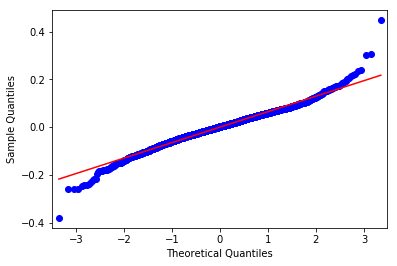

<Figure size 720x576 with 0 Axes>

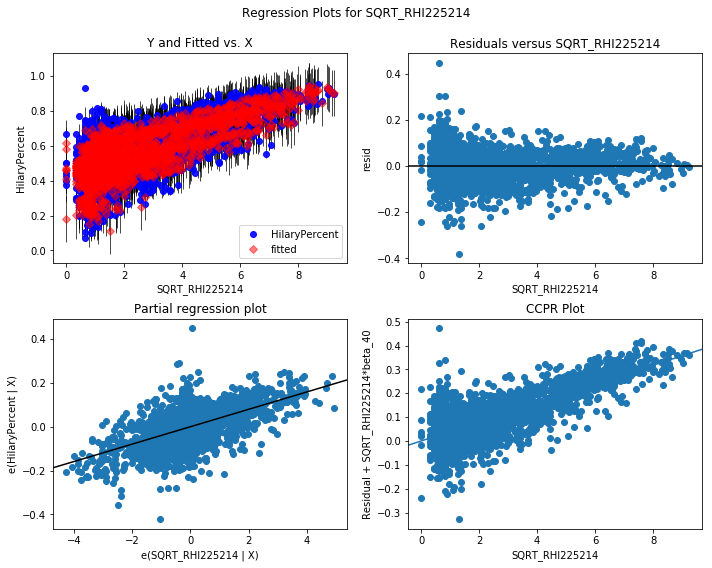

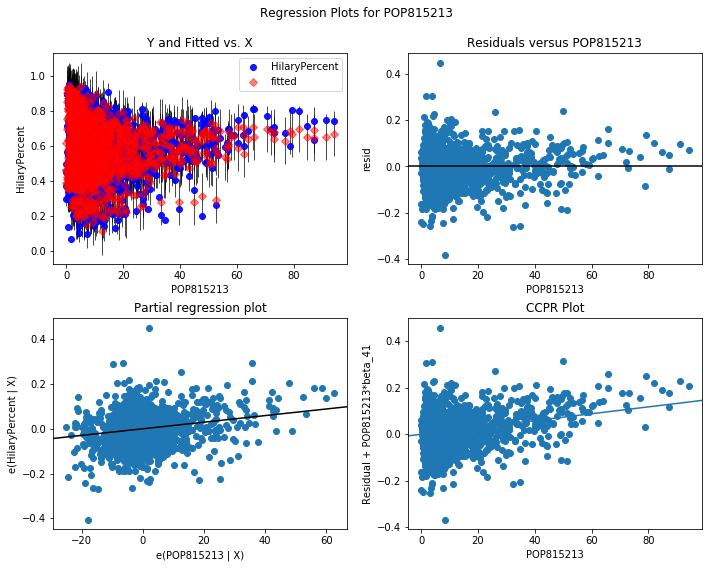

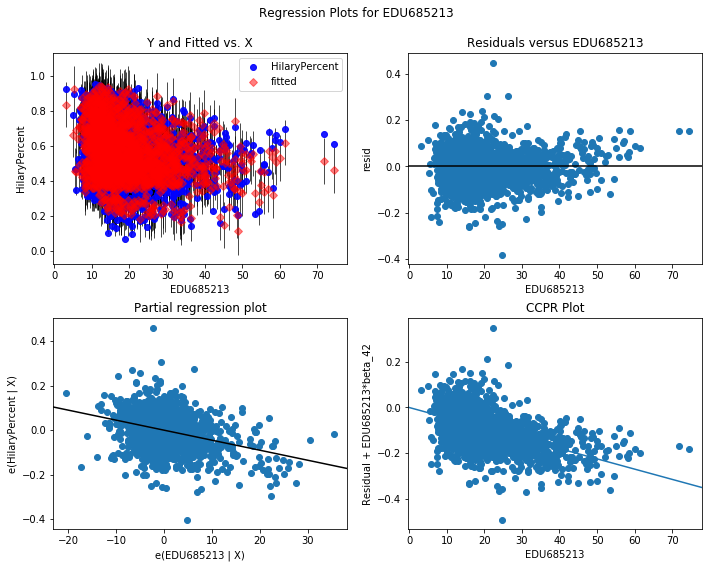

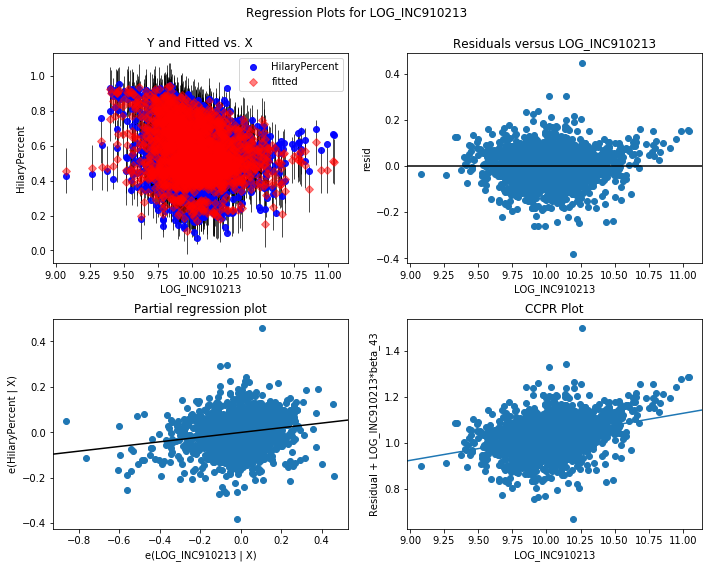

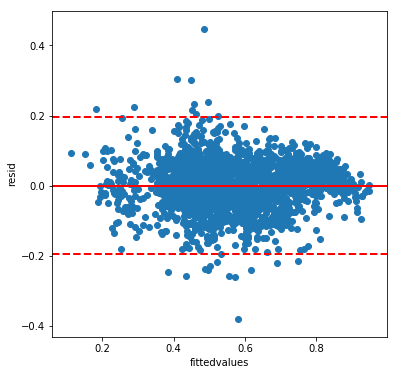

In [41]:
target = 'HilaryPercent'
candidates = ['C(state_abbreviation)', 'SQRT_RHI225214', 'POP815213', 'EDU685213','LOG_INC910213']

model_t = modelFitting(target, candidates, df_t);

print(model_t.summary())

fig = plt.figure(figsize=(6,6))
fig = sm.qqplot(model_t.resid, stats.distributions.norm, line='r') 

for i in candidates:
    try:
        fig = plt.figure(figsize=(10,8))
        fig = sm.graphics.plot_regress_exog(model_t, i , fig=fig)
    except:
        pass
    
fig = plt.figure(figsize=(6,6))
#plt.scatter(model_t.fittedvalues, model_t.resid_pearson)
plt.scatter(model_t.fittedvalues, model_t.resid)

plt.ylabel('resid')
plt.xlabel('fittedvalues') 

plt.axhline(y=0, linewidth=2, color = 'r')
#plt.axhline(y=3, linestyle='dashed', linewidth=2, color = 'r')
#plt.axhline(y=-3, linestyle='dashed', linewidth=2, color = 'r')

plt.axhline(y=model_t.resid.mean() + 3 * model_t.resid.std(), linestyle='dashed', linewidth=2, color = 'r')
plt.axhline(y=model_t.resid.mean() - 3 * model_t.resid.std(), linestyle='dashed', linewidth=2, color = 'r')

KFold(n_splits=20, random_state=None, shuffle=True)
HilaryPercent ~ C(state_abbreviation) + SQRT_RHI225214 + POP815213 + EDU685213 + LOG_INC910213 + 1


C:\Users\joechongwk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\joechongwk\Anaconda3\lib\site-packages\pandas\core\indexing.py:116: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


          R2       AR2          AIC          BIC       MSE
0   0.831880  0.828751 -6077.917869 -5824.307533  0.004620
1   0.829335  0.826159 -6045.599534 -5791.989197  0.003503
2   0.829829  0.826660 -6045.522378 -5791.930737  0.003583
3   0.831455  0.828316 -6089.712385 -5836.120744  0.005109
4   0.834516  0.831435 -6150.164554 -5896.554218  0.007141
5   0.827174  0.823956 -6054.825735 -5801.234094  0.003893
6   0.829088  0.825905 -6078.848643 -5825.257002  0.004767
7   0.826990  0.823772 -6051.930693 -5798.282989  0.003535
8   0.828797  0.825612 -6060.856864 -5807.227840  0.003939
9   0.828483  0.825291 -6073.286195 -5819.675859  0.004469
10  0.829651  0.826480 -6079.692682 -5826.082345  0.004690
11  0.828609  0.825419 -6047.228081 -5793.617744  0.003520
12  0.831472  0.828336 -6113.756043 -5860.127019  0.005806
13  0.830322  0.827163 -6062.104096 -5808.493760  0.004091
14  0.831343  0.828204 -6104.818696 -5851.208359  0.005607
15  0.826256  0.823022 -6050.404124 -5796.793787  0.0036

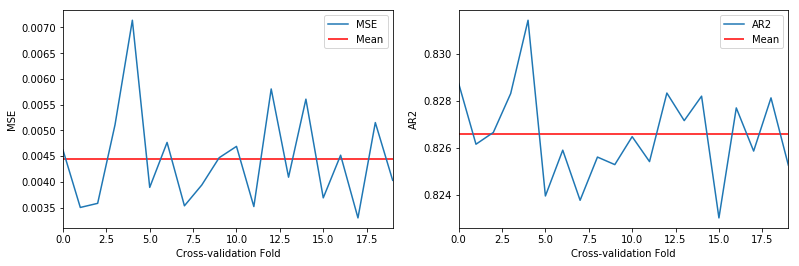

In [32]:
from sklearn.model_selection import KFold

def CrossValidation(formula, kf, dataset, response):
    results = pd.DataFrame({'R2':[],'AR2':[],"AIC":[], "BIC":[],"MSE":[]})
    
    # evaluate all accuracy based on the folds
    for train_index, test_index in kf.split(dataset):
        d_train, d_test = dataset.ix[train_index,:], dataset.ix[test_index,:]
        lmfit = smf.ols(formula, d_train).fit();
        pred = lmfit.predict(d_test)
        mse = (np.power(pred - d_test[response],2)).mean()
        results = results.append({'R2':lmfit.rsquared,'AR2':lmfit.rsquared_adj, "AIC": lmfit.aic, "BIC": lmfit.bic,"MSE":mse},ignore_index=True);
        
    # Wrap everything up in a nice dataframe
    return results;


kf = KFold(20, shuffle=True)
print(kf)

formula = "{} ~ {} + 1".format(target, ' + '.join(candidates))
print(formula)

result = CrossValidation(formula, kf, df_t, target)
print(result)


fig, axes = plt.subplots(figsize=(13,4), nrows=1, ncols=2, sharey=False)
fig.subplots_adjust(hspace=0.1, wspace=0.2)

axes[0].plot(result['MSE'])
axes[0].set_xlabel('Cross-validation Fold')
axes[0].set_ylabel('MSE')
axes[0].hlines(xmin=0, xmax=19,y=result['MSE'].mean(), colors='r')
axes[0].set_xlim([0, 19])
axes[0].legend(['MSE', 'Mean'])

axes[1].plot(result['AR2'])
axes[1].set_xlabel('Cross-validation Fold')
axes[1].set_ylabel('AR2')
axes[1].hlines(xmin=0, xmax=19,y=result['AR2'].mean(), colors='r')
axes[1].set_xlim([0, 19])
axes[1].legend(['AR2', 'Mean'])

In [33]:
# Variance Inflation Factor
vif = []
for i in range(len(candidates)):
    vif.append(sms.outliers_influence.variance_inflation_factor(model_t.model.exog, i))

df = pd.DataFrame({'Variable': candidates, 'VIF': vif})

df.sort_values('VIF', ascending=False)

Variable          VIF
0  C(state_abbreviation)  6562.556893
4          LOG_INC910213     2.269516
3              EDU685213     2.159476
1         SQRT_RHI225214     2.138705
2              POP815213     1.291423

C:\Users\joechongwk\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


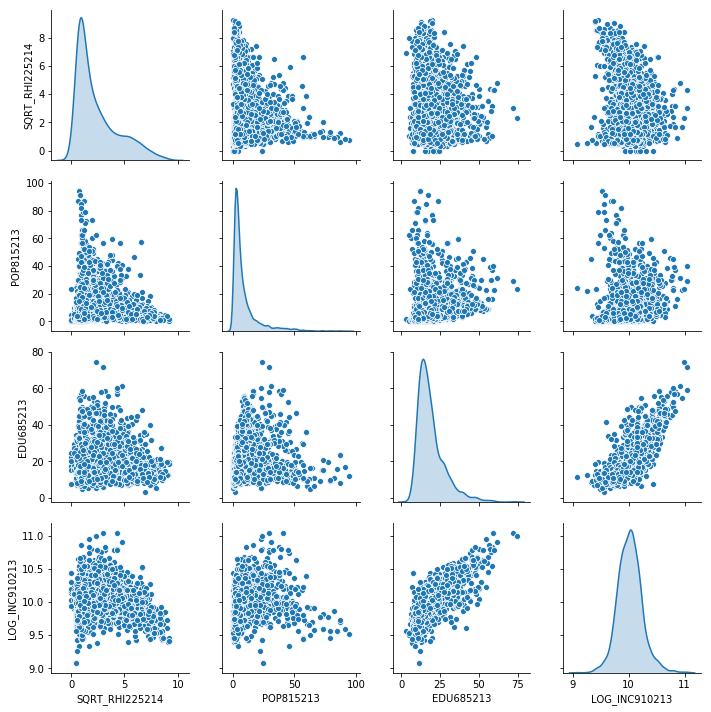

In [38]:
sns.pairplot(df_t[['SQRT_RHI225214', 'POP815213', 'EDU685213','LOG_INC910213']], diag_kind='kde')